In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!pip install urlextract
from urlextract import URLExtract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud
import string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/dataset/WhatsApp Chat with Socrates Club 2022-23.txt"
f = open(path, 'r', encoding='utf-8')
data = f.read()

In [ ]:
print(data)

17/08/22, 1:21 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
15/08/22, 6:05 pm - +974 3392 8540 created group "Socrates Club 2022-23💫"
17/08/22, 1:21 pm - You joined using this group's invite link
17/08/22, 1:21 pm - +91 6379 870 668 joined using this group's invite link
17/08/22, 1:22 pm - +91 76107 47723 joined using this group's invite link
17/08/22, 1:26 pm - +91 96435 03264 joined using this group's invite link
17/08/22, 1:29 pm - +91 91760 29900 joined using this group's invite link
17/08/22, 1:30 pm - +91 78911 88729 joined using this group's invite link
17/08/22, 1:34 pm - +91 95144 29300 joined using this group's invite link
17/08/22, 1:36 pm - +91 95990 57278 joined using this group's invite link
17/08/22, 1:37 pm - +91 94876 04349 joined using this group's invite link
17/08/22, 1:42 pm - +91 86105 57510 joined using this group's invite link
17/08/22, 1:52 pm - +91 86754 62014: 

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1807f72bc17845cde6cca52eb4b1b44a9b804d5f779d6a6d6cb3d7d4f1d71e48
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''

    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%y, %I:%M %p - ',
        '24hr' : '%d/%m/%y, %H:%M - ',
        'custom': ''
    }

    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns

        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df

    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])

    # split user and msg
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)

    return df

In [ ]:
df = rawToDf('/content/drive/MyDrive/dataset/WhatsApp Chat with Socrates Club 2022-23.txt', '12hr')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  3026 non-null   datetime64[ns]
 1   user       3026 non-null   object        
 2   message    3026 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 71.0+ KB


In [ ]:
df.sample(10)

,date_time,user,message
1761,2022-11-22 13:34:00,+91 95998 71729,was a practice in stoicism
1440,2022-11-21 09:35:00,+91 89391 81374,?????
1977,2022-12-13 19:36:00,+91 91760 29900,"In any case, the only opinion that needs to be..."
179,2022-08-20 02:22:00,+91 82915 31980,Hmmm
566,2022-08-22 20:13:00,group_notification,+91 77089 33898 left
1108,2022-09-13 10:45:00,+91 91760 29900,No Humans have done better because we have a b...
1406,2022-11-15 18:16:00,+91 6303 073 843,I mean
1431,2022-11-21 09:08:00,+91 95998 71729,if you're actively hating him and complaining ...
822,2022-09-13 00:00:00,+91 88261 45531,Like Hindu hell 😭
2019,2022-12-15 20:57:00,group_notification,+91 76666 49252 joined using this group's invi...


In [ ]:
df.rename(columns={'date_time': 'date','message':'user_message'}, inplace=True)
# df = pd.DataFrame({'user_message': message, 'message_date': dates})
# convert message_date type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %H:%M - ')
#rename the col


In [ ]:
# #separate Users and Message
# users = []
# messages = []
# for message in df['user_message']:
#     entry = re.split('([\w\W]+?):\s', message)
#     if entry[1:]:  # user name
#         users.append(entry[1])
#         messages.append(" ".join(entry[2:]))
#     else:
#         users.append('group_notification')
#         messages.append(entry[0])

# df['user'] = users
# df['message'] = messages
# df.drop(columns=['user_message'], inplace=True)

In [ ]:
#Extract multiple columns from Date Column
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['Time'] = df['date'].dt.time

In [ ]:
df['Time']

0       13:21:00
1       18:05:00
2       13:21:00
3       13:21:00
4       13:22:00
          ...   
3021    21:14:00
3022    09:40:00
3023    21:27:00
3024    21:31:00
3025    06:00:00
Name: Time, Length: 3026, dtype: object

In [ ]:


#add the period column to the data (This basically shows the data of 20-21, 22-23)
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [ ]:

df.head(500)

,date,user,user_message,only_date,year,month_num,month,day,day_name,hour,minute,Time,period
0,2022-08-17 13:21:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022-08-17,2022,8,August,17,Wednesday,13,21,13:21:00,13-14
1,2022-08-15 18:05:00,group_notification,"+974 3392 8540 created group ""Socrates Club 20...",2022-08-15,2022,8,August,15,Monday,18,5,18:05:00,18-19
2,2022-08-17 13:21:00,group_notification,You joined using this group's invite link,2022-08-17,2022,8,August,17,Wednesday,13,21,13:21:00,13-14
3,2022-08-17 13:21:00,group_notification,+91 6379 870 668 joined using this group's inv...,2022-08-17,2022,8,August,17,Wednesday,13,21,13:21:00,13-14
4,2022-08-17 13:22:00,group_notification,+91 76107 47723 joined using this group's invi...,2022-08-17,2022,8,August,17,Wednesday,13,22,13:22:00,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022-08-22 19:36:00,+91 95144 29300,SORRY ive been doing my data analytics project...,2022-08-22,2022,8,August,22,Monday,19,36,19:36:00,19-20
496,2022-08-22 19:36:00,+91 86670 32993,Indeed. It's about *unification*,2022-08-22,2022,8,August,22,Monday,19,36,19:36:00,19-20
497,2022-08-22 19:37:00,+91 86670 32993,"To unify, we will have to start with a definit...",2022-08-22,2022,8,August,22,Monday,19,37,19:37:00,19-20
498,2022-08-22 19:37:00,+91 95144 29300,fr tho has someone tried stuffing phylosophy i...,2022-08-22,2022,8,August,22,Monday,19,37,19:37:00,19-20


In [ ]:
df.shape

(3026, 13)

In [ ]:
#Total Messages
df.shape[0]

3026

In [ ]:
grp_notif=df.loc[df["user"]=="group_notification"]

In [ ]:
df=df[df["user"]!="group_notification"]
df.head(10)

,date,user,user_message,only_date,year,month_num,month,day,day_name,hour,minute,Time,period
12,2022-08-17 13:52:00,+91 86754 62014,🙌🏼,2022-08-17,2022,8,August,17,Wednesday,13,52,13:52:00,13-14
41,2022-08-19 13:54:00,+974 3392 8540,Hey everyone welcome to a brand new year with ...,2022-08-19,2022,8,August,19,Friday,13,54,13:54:00,13-14
46,2022-08-19 14:47:00,+91 86754 62014,🙌🏼🙌🏼🙌🏼,2022-08-19,2022,8,August,19,Friday,14,47,14:47:00,14-15
47,2022-08-19 15:23:00,+91 863 745 2798,Likewise :),2022-08-19,2022,8,August,19,Friday,15,23,15:23:00,15-16
51,2022-08-19 20:02:00,+91 73585 15264,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,2022,8,August,19,Friday,20,2,20:02:00,20-21
52,2022-08-19 20:03:00,+91 86754 62014,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21
53,2022-08-19 20:03:00,+91 82915 31980,I'm just a noob here for the 3AM existential c...,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21
54,2022-08-19 20:03:00,+91 82915 31980,<Media omitted>,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21
55,2022-08-19 20:04:00,+91 86754 62014,😄😄😄,2022-08-19,2022,8,August,19,Friday,20,4,20:04:00,20-21
56,2022-08-19 20:04:00,+91 82915 31980,You have any favs?,2022-08-19,2022,8,August,19,Friday,20,4,20:04:00,20-21


In [ ]:
df.shape

(2878, 13)

In [ ]:
#Total Number of words
words = []
for message in df['user_message']:
  words.extend(message.split())

print(len(words))

28420


In [ ]:
extract = URLExtract()

links = []
for message in df['user_message']:
    links.extend(extract.find_urls(message))
no_tot_links = len(links)
print(len(links))

29


## Most Busy Users

- Count the number of messages send by per user and pick top 5 users
- keep user name on x-axis and count on y-axis to plot a bar graph and display the information

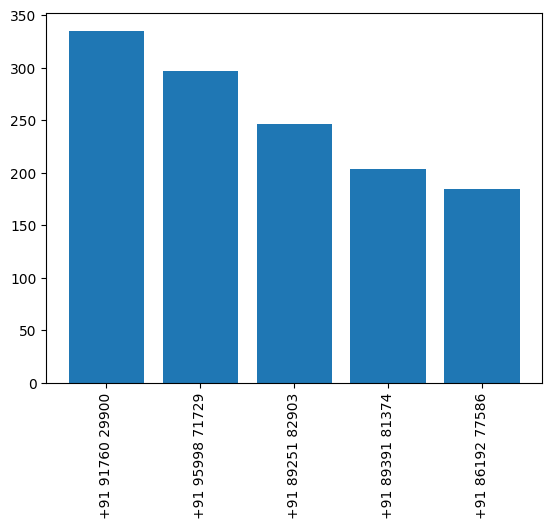

In [ ]:
x = df['user'].value_counts().head()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
new_df = round(((df['user'].value_counts() / df.shape[0]) * 100), 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

new_df

,name,percent
0,+91 91760 29900,11.64
1,+91 95998 71729,10.32
2,+91 89251 82903,8.55
3,+91 89391 81374,7.09
4,+91 86192 77586,6.43
...,...,...
62,+91 97670 07211,0.03
63,+91 99000 97092,0.03
64,+91 70653 78580,0.03
65,+91 90196 52837,0.03


In [ ]:
df['only_date'] = pd.to_datetime(df['only_date'], errors='coerce')

In [ ]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['only_date'].dt.weekday.map(weeks)
main_df = df
### Rearranging the columns for better understanding
df = df[['only_date','Day','user','user_message']]
### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')
### Looking newborn dataset.
df.head(60)

,only_date,Day,user,user_message
12,2022-08-17,Wednesday,+91 86754 62014,🙌🏼
41,2022-08-19,Friday,+974 3392 8540,Hey everyone welcome to a brand new year with ...
46,2022-08-19,Friday,+91 86754 62014,🙌🏼🙌🏼🙌🏼
47,2022-08-19,Friday,+91 863 745 2798,Likewise :)
51,2022-08-19,Friday,+91 73585 15264,Hey guys! Hope all of you are doing good!! Sin...
52,2022-08-19,Friday,+91 86754 62014,Yayyyyy 👏🏼👏🏼👏🏼👏🏼
53,2022-08-19,Friday,+91 82915 31980,I'm just a noob here for the 3AM existential c...
54,2022-08-19,Friday,+91 82915 31980,<Media omitted>
55,2022-08-19,Friday,+91 86754 62014,😄😄😄
56,2022-08-19,Friday,+91 82915 31980,You have any favs?


In [ ]:
df.columns

Index(['only_date', 'Day', 'user', 'user_message'], dtype='object')

In [ ]:
### Counting number of letters in each message
df['Letter'] = df['user_message'].apply(lambda s : len(s))
### Counting number of word's in each message
df['Word'] = df['user_message'].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df['user_message'].apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df['user_message'].apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,only_date,Day,user,user_message,Letter,Word,Url_Count,Media_Count
12,2022-08-17,Wednesday,+91 86754 62014,🙌🏼,3,2,0,0
41,2022-08-19,Friday,+974 3392 8540,Hey everyone welcome to a brand new year with ...,104,18,0,0
46,2022-08-19,Friday,+91 86754 62014,🙌🏼🙌🏼🙌🏼,7,2,0,0
47,2022-08-19,Friday,+91 863 745 2798,Likewise :),12,3,0,0
51,2022-08-19,Friday,+91 73585 15264,Hey guys! Hope all of you are doing good!! Sin...,256,46,0,0
...,...,...,...,...,...,...,...,...
3019,2023-03-09,Thrusday,+91 91531 97456,its actually 4 (the trolley problem in itself ...,56,10,0,0
3020,2023-03-09,Thrusday,+91 94705 51867,Sisyphus needs a beer,22,5,0,0
3022,2023-03-28,Tuesday,+91 98400 46994,<Media omitted>,16,3,0,1
3023,2023-03-29,Wednesday,+91 6363 830 391,Thougts on positive nihilism?,30,5,0,0


In [ ]:
total_messages = df.shape[0]

print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(len(words)))
print('Total Number of Media Messages : {}'.format(media))

print('Total Number of Links : {}'.format(no_tot_links))

Group Chatting Stats : 
Total Number of Messages : 28420
Total Number of Media Messages : 77
Total Number of Links : 29


In [ ]:
l = df.user.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["user"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  ### links consist of total links
  links = sum(req_df["Url_Count"])
  print('Total Links Sent : ', links)


--> Stats of +91 86754 62014 <-- 
Total Message Sent :  6
Average Words per Message :  3.000
Total Media Message Sent :  0
Total Links Sent :  0
--> Stats of +974 3392 8540 <-- 
Total Message Sent :  16
Average Words per Message :  8.690
Total Media Message Sent :  0
Total Links Sent :  0
--> Stats of +91 863 745 2798 <-- 
Total Message Sent :  1
Average Words per Message :  3.000
Total Media Message Sent :  0
Total Links Sent :  0
--> Stats of +91 73585 15264 <-- 
Total Message Sent :  73
Average Words per Message :  23.600
Total Media Message Sent :  2
Total Links Sent :  0
--> Stats of +91 82915 31980 <-- 
Total Message Sent :  42
Average Words per Message :  6.500
Total Media Message Sent :  1
Total Links Sent :  0
--> Stats of +91 6363 830 391 <-- 
Total Message Sent :  28
Average Words per Message :  11.430
Total Media Message Sent :  0
Total Links Sent :  0
--> Stats of +91 91506 60732 <-- 
Total Message Sent :  62
Average Words per Message :  12.610
Total Media Message Sent :  

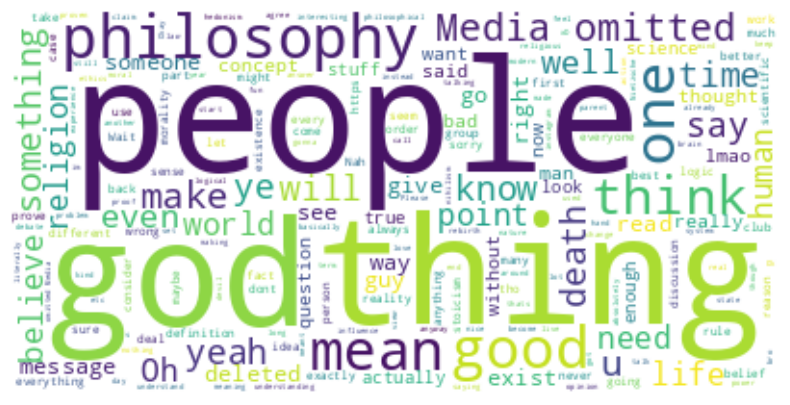

In [ ]:
### Word Cloud of mostly used word in our Group
from wordcloud import WordCloud , STOPWORDS
text = " ".join(review for review in df['user_message'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
### Creates a list of unique Authors
l = df.user.unique()
l.sort()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["user"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

+91 6303 073 843   ->   61
+91 6360 390 121   ->   1
+91 6360 693 096   ->   2
+91 6363 830 391   ->   28
+91 70653 78580   ->   1
+91 70733 33444   ->   20
+91 72001 98776   ->   1
+91 73055 62967   ->   146
+91 73582 17742   ->   13
+91 73585 15264   ->   73
+91 73587 16996   ->   1
+91 76950 08101   ->   1
+91 77669 03456   ->   6
+91 78922 34290   ->   84
+91 78926 30508   ->   9
+91 79736 97478   ->   1
+91 80567 38623   ->   10
+91 81788 06102   ->   3
+91 82915 31980   ->   42
+91 84476 68259   ->   50
+91 86104 18421   ->   12
+91 86105 57510   ->   2
+91 86107 66865   ->   18
+91 86192 77586   ->   185
+91 863 745 2798   ->   1
+91 86670 32993   ->   43
+91 86754 62014   ->   6
+91 88261 45531   ->   86
+91 89195 43387   ->   4
+91 89251 82903   ->   246
+91 89391 81374   ->   204
+91 89393 73649   ->   27
+91 90196 52837   ->   1
+91 91106 43829   ->   17
+91 91502 35741   ->   1
+91 91505 09998   ->   1
+91 91506 60732   ->   62
+91 91531 97456   ->   69
+91 91760 29900   ->

In [ ]:
# Let’s check who is the mostly active author of the group :
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['user'].value_counts()

mostly_active

+91 91760 29900    335
+91 95998 71729    297
+91 89251 82903    246
+91 89391 81374    204
+91 86192 77586    185
                  ... 
+91 97670 07211      1
+91 99000 97092      1
+91 70653 78580      1
+91 90196 52837      1
+91 97477 28683      1
Name: user, Length: 67, dtype: int64

<Figure size 900x600 with 0 Axes>

In [ ]:
# Let’s print total messages sent on each day of the week :
l = df.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Wednesday   ->   367
Friday   ->   94
Saturday   ->   664
Sunday   ->   152
Monday   ->   916
Tuesday   ->   642
Thrusday   ->   43


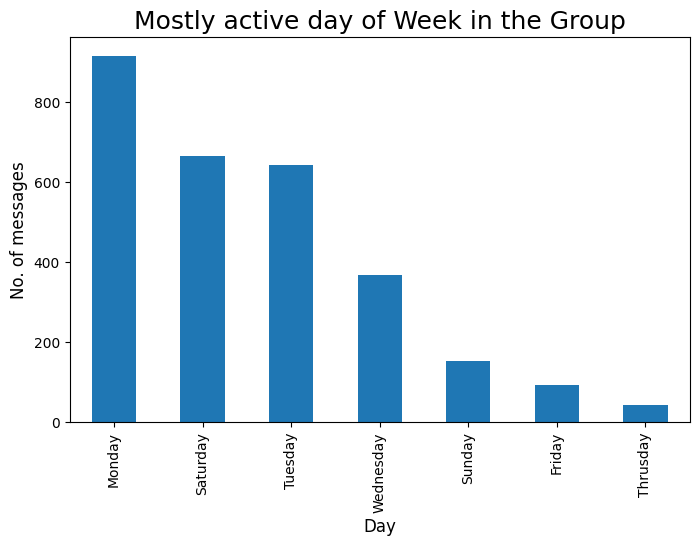

In [ ]:
# Let’s check mostly active day in a week :
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
### Top 10 peoples that are mostly active in our Group is :
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

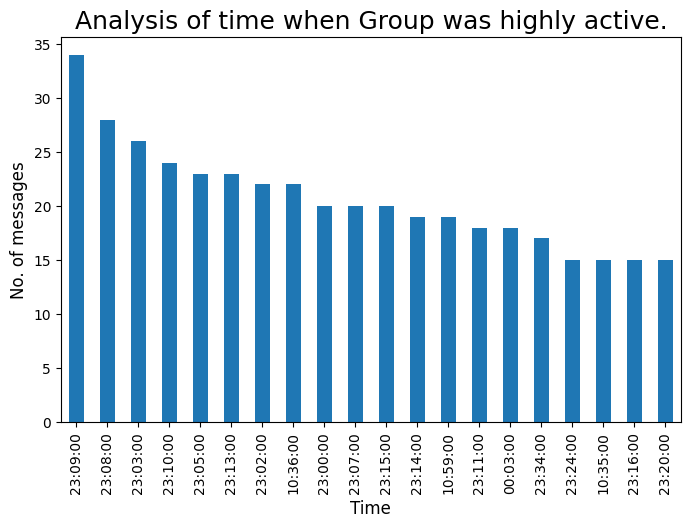

In [ ]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = main_df['Time'].value_counts().head(20)
tx = t.plot.bar()
# tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:


df=main_df

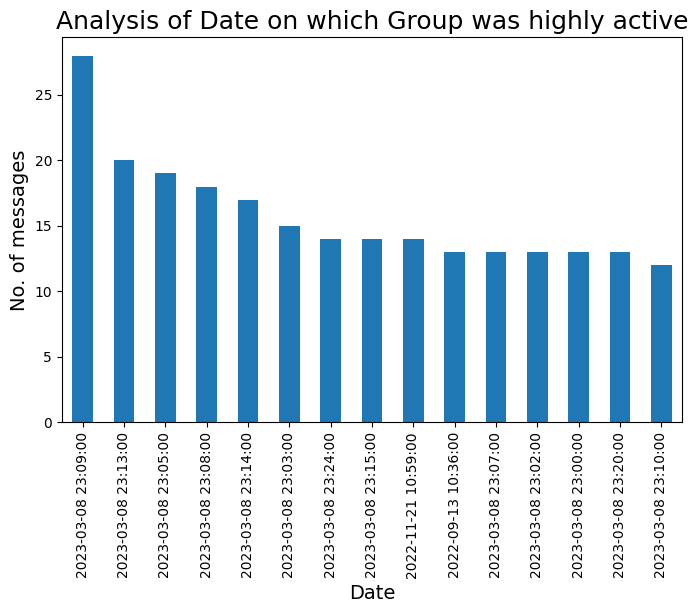

In [ ]:
### Date on which our Group was highly active.
plt.figure(figsize=(8,5))
df['date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
#Let’s create a time series plot w.r.t. no. of messages :
from plotly import express as px

z = df['date'].value_counts()
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['date'].map(z1)
### Timeseries plot
fig = px.line(x=df['date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of messages using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

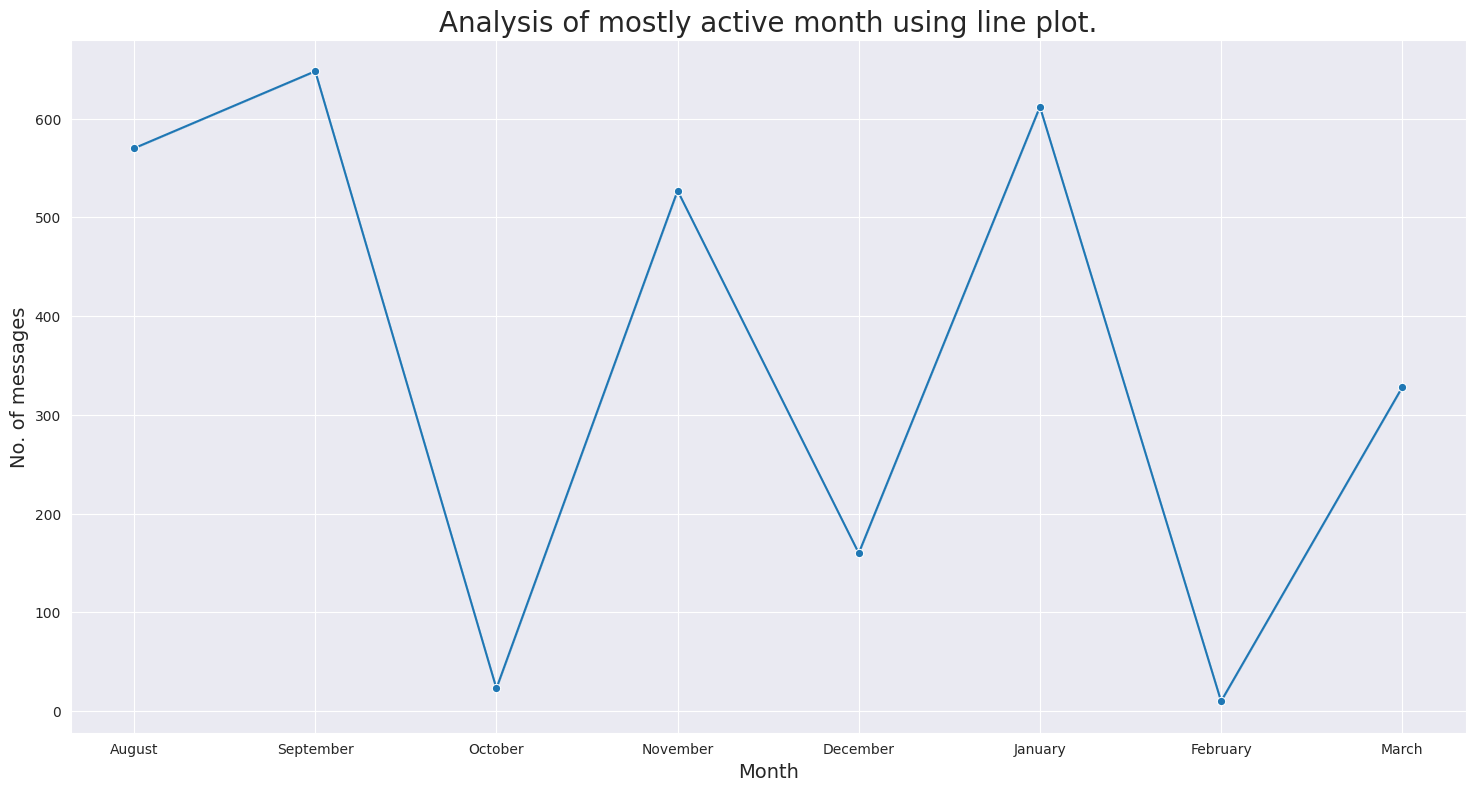

In [ ]:
# Let’s analyze the most active month using a line plot :
import seaborn as sns
z = df['month'].value_counts()
z1 = z.to_dict() #converts to dictionary
df['Msg_count_monthly'] = df['month'].map(z1)
plt.figure(figsize=(18,9))
sns.set_style("darkgrid")
sns.lineplot(data=df,x='month',y='Msg_count_monthly',markers=True,marker='o')
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month using line plot.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

Topic modeling

In [ ]:
# Install bertopic
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [ ]:
from bertopic import BERTopic

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head(20)

,date,user,user_message,only_date,year,month_num,month,day,day_name,hour,minute,Time,period,Day,Msg_count,Msg_count_monthly
12,2022-08-17 13:52:00,+91 86754 62014,🙌🏼,2022-08-17,2022,8,August,17,Wednesday,13,52,13:52:00,13-14,Wednesday,1,570
41,2022-08-19 13:54:00,+974 3392 8540,Hey everyone welcome to a brand new year with ...,2022-08-19,2022,8,August,19,Friday,13,54,13:54:00,13-14,Friday,1,570
46,2022-08-19 14:47:00,+91 86754 62014,🙌🏼🙌🏼🙌🏼,2022-08-19,2022,8,August,19,Friday,14,47,14:47:00,14-15,Friday,1,570
47,2022-08-19 15:23:00,+91 863 745 2798,Likewise :),2022-08-19,2022,8,August,19,Friday,15,23,15:23:00,15-16,Friday,1,570
51,2022-08-19 20:02:00,+91 73585 15264,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,2022,8,August,19,Friday,20,2,20:02:00,20-21,Friday,1,570
52,2022-08-19 20:03:00,+91 86754 62014,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21,Friday,3,570
53,2022-08-19 20:03:00,+91 82915 31980,I'm just a noob here for the 3AM existential c...,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21,Friday,3,570
54,2022-08-19 20:03:00,+91 82915 31980,<Media omitted>,2022-08-19,2022,8,August,19,Friday,20,3,20:03:00,20-21,Friday,3,570
55,2022-08-19 20:04:00,+91 86754 62014,😄😄😄,2022-08-19,2022,8,August,19,Friday,20,4,20:04:00,20-21,Friday,7,570
56,2022-08-19 20:04:00,+91 82915 31980,You have any favs?,2022-08-19,2022,8,August,19,Friday,20,4,20:04:00,20-21,Friday,7,570


In [ ]:
new_df.head()

,name,percent
0,+91 91760 29900,11.64
1,+91 95998 71729,10.32
2,+91 89251 82903,8.55
3,+91 89391 81374,7.09
4,+91 86192 77586,6.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 12 to 3024
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2878 non-null   datetime64[ns]
 1   user               2878 non-null   object        
 2   user_message       2878 non-null   object        
 3   only_date          2878 non-null   datetime64[ns]
 4   year               2878 non-null   int64         
 5   month_num          2878 non-null   int64         
 6   month              2878 non-null   object        
 7   day                2878 non-null   int64         
 8   day_name           2878 non-null   object        
 9   hour               2878 non-null   int64         
 10  minute             2878 non-null   int64         
 11  Time               2878 non-null   object        
 12  period             2878 non-null   object        
 13  Day                2878 non-null   object        
 14  Msg_cou

In [ ]:
df_topic = pd.DataFrame({'user_message': df['user_message'], 'message_date': df['only_date']})

In [ ]:
df_topic.head(10)

,user_message,message_date
12,🙌🏼,2022-08-17
41,Hey everyone welcome to a brand new year with ...,2022-08-19
46,🙌🏼🙌🏼🙌🏼,2022-08-19
47,Likewise :),2022-08-19
51,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19
52,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,2022-08-19
53,I'm just a noob here for the 3AM existential c...,2022-08-19
54,<Media omitted>,2022-08-19
55,😄😄😄,2022-08-19
56,You have any favs?,2022-08-19


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [ ]:


nltk.download('wordnet') # Download the WordNet corpus

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """
    A helper function to lemmatize text.
    """
    return " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)])

def remove_stop_words(text):
    """
    A helper function to remove stop words from text.
    """
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return " ".join(filtered_tokens)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Remove stopwords
df_topic['msg_without_stopwords'] = df_topic['user_message'].apply(remove_stop_words)
# Lemmatization
# Apply the lemmatize_text function to the user_message column
df_topic['msg_lemmatized'] = df_topic['user_message'].apply(lemmatize_text)


# Take a look at the data
df_topic = df_topic.reset_index(drop=True)

df_topic.head(50)

,user_message,message_date,msg_without_stopwords,msg_lemmatized
0,🙌🏼,2022-08-17,🙌🏼,🙌🏼
1,Hey everyone welcome to a brand new year with ...,2022-08-19,Hey everyone welcome brand new year socrates !...,Hey everyone welcome to a brand new year with ...
2,🙌🏼🙌🏼🙌🏼,2022-08-19,🙌🏼🙌🏼🙌🏼,🙌🏼🙌🏼🙌🏼
3,Likewise :),2022-08-19,Likewise : ),Likewise : )
4,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,Hey guys ! Hope good ! ! Since nice number peo...,Hey guy ! Hope all of you are doing good ! ! S...
5,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,2022-08-19,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,Yayyyyy 👏🏼👏🏼👏🏼👏🏼
6,I'm just a noob here for the 3AM existential c...,2022-08-19,'m noob 3AM existential crisis discussions,I 'm just a noob here for the 3AM existential ...
7,<Media omitted>,2022-08-19,< Media omitted >,< Media omitted >
8,😄😄😄,2022-08-19,😄😄😄,😄😄😄
9,You have any favs?,2022-08-19,favs ?,You have any favs ?


In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_topic["msg_lemmatized"])

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1026,-1_it_to_that_nt
1,0,77,0_omitted_media__
2,1,62,1_death_life_die_mortal
3,2,59,2_science_scientific_universe_theory
4,3,56,3_religion_mythology_western_greek
...,...,...,...
73,72,12,72_scp_scp049_049_touch
74,73,12,73_last_thursday_thursdayism_created
75,74,12,74_happy_streak_happiness_path
76,75,10,75_does_mean_nt_mason


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('omitted', 0.8553169622078434),
 ('media', 0.8553169622078434),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [ ]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

In [ ]:
# Visualize probability distribution
topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.002)

In [ ]:
# Save the chart to a variable
chart = topic_model.visualize_distribution(topic_model.probabilities_[0])

# Write the chart as a html file
chart.write_html("topicmodeling_socratesgrp.html")

In [ ]:
df_topic['user_message'][0]

'🙌🏼 '

In [ ]:
# Get probabilities for all topics
topic_model.probabilities_[0]

array([4.34776633e-05, 1.48555291e-04, 1.52008727e-04, 1.33585306e-04,
       1.26885045e-04, 1.24424235e-04, 2.44363528e-04, 1.39651835e-04,
       3.22825464e-04, 1.35463398e-04, 2.45733409e-04, 2.08124646e-04,
       1.40300910e-04, 2.07191161e-04, 1.53566492e-04, 1.23033524e-04,
       1.65389423e-04, 2.52065027e-04, 1.42694711e-04, 2.46839379e-04,
       1.49384025e-04, 2.26788602e-04, 1.38853105e-04, 1.66270362e-04,
       5.12774564e-05, 2.49369073e-04, 1.64817249e-04, 1.73204152e-04,
       2.10282194e-04, 1.93741994e-04, 2.18758150e-04, 2.43681359e-04,
       1.63626569e-04, 2.20165720e-04, 1.37376940e-04, 2.81147942e-04,
       2.15443843e-04, 5.80571526e-03, 1.98277505e-04, 9.70695034e-01,
       1.44347257e-04, 1.91062059e-04, 1.64922923e-04, 2.07835684e-04,
       1.52219573e-04, 2.01183619e-04, 1.86842227e-04, 1.41507598e-04,
       2.09673397e-04, 1.44109088e-04, 1.95711087e-04, 2.26318273e-04,
       1.78411201e-04, 3.10076288e-04, 2.27788976e-04, 2.22494024e-04,
      

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

# Save the predictions in the dataframe
df_topic['topic_prediction'] = topic_prediction

# Take a look at the data
df_topic.head(10)

,user_message,message_date,msg_without_stopwords,msg_lemmatized,topic_prediction
0,🙌🏼,2022-08-17,🙌🏼,🙌🏼,39
1,Hey everyone welcome to a brand new year with ...,2022-08-19,Hey everyone welcome brand new year socrates !...,Hey everyone welcome to a brand new year with ...,-1
2,🙌🏼🙌🏼🙌🏼,2022-08-19,🙌🏼🙌🏼🙌🏼,🙌🏼🙌🏼🙌🏼,-1
3,Likewise :),2022-08-19,Likewise : ),Likewise : ),-1
4,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,Hey guys ! Hope good ! ! Since nice number peo...,Hey guy ! Hope all of you are doing good ! ! S...,12
5,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,2022-08-19,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,Yayyyyy 👏🏼👏🏼👏🏼👏🏼,8
6,I'm just a noob here for the 3AM existential c...,2022-08-19,'m noob 3AM existential crisis discussions,I 'm just a noob here for the 3AM existential ...,7
7,<Media omitted>,2022-08-19,< Media omitted >,< Media omitted >,0
8,😄😄😄,2022-08-19,😄😄😄,😄😄😄,37
9,You have any favs?,2022-08-19,favs ?,You have any favs ?,-1


In [ ]:
new_data = """ Student 1: Hey, have you guys ever heard of Utilitarianism? I just learned about it in my ethics class and it's really interesting.

Student 2: Yeah, I've heard of it. Isn't that the philosophy that says the right course of action is the one that maximizes overall happiness for the greatest number of people?

Student 3: I think it's also supposed to minimize overall pain or suffering, right?

Student 1: Exactly! It's all about promoting the greatest good for the greatest number of people. But I know some people criticize it for overlooking individual rights and justice.

Student 4: Yeah, that's one of my concerns with Utilitarianism. It seems like it could justify some pretty unethical actions if they benefit the majority.

Student 2: That's a valid point, but I think it's still an important philosophy to consider. It's used in a lot of practical fields, like healthcare and economics, to guide decision-making.

Student 3: Plus, some of the most well-known philosophers like Jeremy Bentham and John Stuart Mill were proponents of Utilitarianism. So it definitely has some intellectual weight behind it.

Student 1: I also read that Peter Singer, a modern philosopher, has contributed a lot to the development and popularization of Utilitarianism. Have any of you read his work?

Student 4: Yeah, I've read his book "Animal Liberation". It applies Utilitarianism to the treatment of animals and argues that we should reduce their suffering as much as possible.

Student 2: That's really interesting. I think it goes to show how versatile Utilitarianism can be in addressing a wide range of ethical issues. """

In [ ]:

# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_data, top_n=num_of_topics);

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [5, 12, 7], and the similarities are [0.29 0.19 0.15]


In [ ]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 5 are:
[('morality', 0.07289558087501104), ('ethic', 0.047336800932438736), ('moral', 0.038726700574096495), ('empathy', 0.024639844929029955), ('law', 0.019257872382454893), ('on', 0.017400702426844952), ('and', 0.01721792016622626), ('is', 0.01721512886643442), ('god', 0.015234006583605854), ('system', 0.014317120574891259)]
The top keywords for topic 12 are:
[('philosophy', 0.10392543948652651), ('grief', 0.03387561829582245), ('thought', 0.023309338536984157), ('logical', 0.02318142640545953), ('define', 0.0208044259959351), ('introspection', 0.02054727253640525), ('idk', 0.02030201575672891), ('engage', 0.01894639716473156), ('futile', 0.01894639716473156), ('is', 0.01803341530993203)]
The top keywords for topic 7 are:
[('nietzsche', 0.05682921564616957), ('nihilism', 0.052457737519541144), ('existentialism', 0.04920326464388132), ('kierkegaard', 0.04356080904281252), ('nihilist', 0.032171024863973934), ('his', 0.02260440860354299), ('crisis', 0.02239084

In [ ]:
# Save the topic model
topic_model.save("group_topic_model")

# Load the topic model
my_model = BERTopic.load("group_topic_model")

NER

In [ ]:
!pip install spacy

!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-11 14:08:40.852463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [ ]:
def get_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities


In [ ]:
df_topic['named_entities'] = df_topic['user_message'].apply(get_entities)



In [ ]:
df_topic.head(100)

,user_message,message_date,msg_without_stopwords,msg_lemmatized,topic_prediction,named_entities
0,🙌🏼,2022-08-17,🙌🏼,🙌🏼,39,[]
1,Hey everyone welcome to a brand new year with ...,2022-08-19,Hey everyone welcome brand new year socrates !...,Hey everyone welcome to a brand new year with ...,-1,"[(new year, DATE)]"
2,🙌🏼🙌🏼🙌🏼,2022-08-19,🙌🏼🙌🏼🙌🏼,🙌🏼🙌🏼🙌🏼,-1,[]
3,Likewise :),2022-08-19,Likewise : ),Likewise : ),-1,[]
4,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,Hey guys ! Hope good ! ! Since nice number peo...,Hey guy ! Hope all of you are doing good ! ! S...,12,[]
...,...,...,...,...,...,...
95,But there is no record to debunk old one bcoz ...,2022-08-20,record debunk old one bcoz altered much taught...,But there is no record to debunk old one bcoz ...,-1,"[(one, CARDINAL)]"
96,~its like making a whatsapp group with extra s...,2022-08-20,~its like making whatsapp group extra steps~,~its like making a whatsapp group with extra s...,58,[]
97,¯\_(ツ)_/¯,2022-08-20,¯\_ ( ツ ) _/¯,¯\_ ( ツ ) _/¯,8,[]
98,Even here an order exist 🌝,2022-08-20,Even order exist 🌝,Even here an order exist 🌝,16,[]


# LSA
Latent Semantic Analysis (LSA): A statistical technique that analyzes the relationships between terms and documents to identify patterns in the text and extract meaningful information.\
\
\
The output is the result of applying Latent Semantic Analysis (LSA) on the input data. The model identified 10 topics in the data and assigned a list of most important terms to each topic. Each topic is represented by a group of terms that are closely related to each other and have a high probability of appearing together in the data.

For example, topic 0 seems to be related to some dark and traumatic events in media, while topic 1 is more general and includes terms like philosophy, people, and God. Topic 6 includes terms related to people, their behavior, and character.

It's worth noting that LSA is an unsupervised learning technique, which means that the topics are inferred based on the statistical patterns in the input data. Therefore, the interpretability of the topics heavily depends on the quality of the input data and the parameters chosen for the model.

In [ ]:
# Importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD



In [ ]:
# Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, use_idf=True)
tfidf_matrix = vectorizer.fit_transform(df_topic['msg_lemmatized'])

# Apply SVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Generate topic numbers
df_topic['LSA_topic'] = lsa_topic_matrix.argmax(axis=1)


In [ ]:
df_topic.head(70)

,user_message,message_date,msg_without_stopwords,msg_lemmatized,topic_prediction,named_entities,LSA_topic
0,🙌🏼,2022-08-17,🙌🏼,🙌🏼,39,[],0
1,Hey everyone welcome to a brand new year with ...,2022-08-19,Hey everyone welcome brand new year socrates !...,Hey everyone welcome to a brand new year with ...,-1,"[(new year, DATE)]",2
2,🙌🏼🙌🏼🙌🏼,2022-08-19,🙌🏼🙌🏼🙌🏼,🙌🏼🙌🏼🙌🏼,-1,[],0
3,Likewise :),2022-08-19,Likewise : ),Likewise : ),-1,[],0
4,Hey guys! Hope all of you are doing good!! Sin...,2022-08-19,Hey guys ! Hope good ! ! Since nice number peo...,Hey guy ! Hope all of you are doing good ! ! S...,12,[],2
...,...,...,...,...,...,...,...
65,Agreed,2022-08-19,Agreed,Agreed,11,[],9
66,French Renaissance If you want a brief yet ac...,2022-08-19,French Renaissance want brief yet accurate und...,French Renaissance If you want a brief yet acc...,-1,"[(French, NORP), (Renaissance, ORG), (Western ...",2
67,"Oh yep I remember, he was tangentially related...",2022-08-19,"Oh yep remember , tangentially related Descartes","Oh yep I remember , he wa tangentially related...",-1,"[(Descartes, GPE)]",5
68,Basically every famous French philosopher is i...,2022-08-19,Basically every famous French philosopher infl...,Basically every famous French philosopher is i...,3,"[(French, NORP), (Montaigne, GPE), (Descartes,...",2


In [ ]:
# Printing the topics
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:30]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
media
omitted
uwu
monster
lh
trauma
worse
ye
darkness
hospital
048
ob
fookin
cthulhu
162
enjoy
net
search
jan
azathoth
baat
youtu
bhai
railed
children
awesome
season
surely
nahi
shipwreck
 
Topic 1: 
wa
deleted
message
like
philosophy
just
mean
people
time
god
thing
yeah
know
yes
think
good
did
wrong
oh
said
nah
say
exactly
saying
life
point
right
reality
random
talking
 
Topic 2: 
yes
like
just
good
god
philosophy
people
thing
yeah
oh
think
mean
doe
say
did
know
point
true
look
time
life
make
death
ah
way
believe
religion
read
need
really
 
Topic 3: 
yes
ah
deleted
message
conservative
agree
obv
planning
haha
valid
oh
society
ethic
ongoing
substance
guess
legit
lived
true
wish
domain
scene
process
thursdayism
according
medium
attorney
decent
tradition
analytics
 
Topic 4: 
like
yes
look
deleted
vit
message
theory
suffering
idol
optimistic
spinoza
cool
hindu
shit
position
profound
inherent
introduce
wait
fr
anime
hi
honest
ya
decided
case
joke
ultimate
minute
depression
 
Top

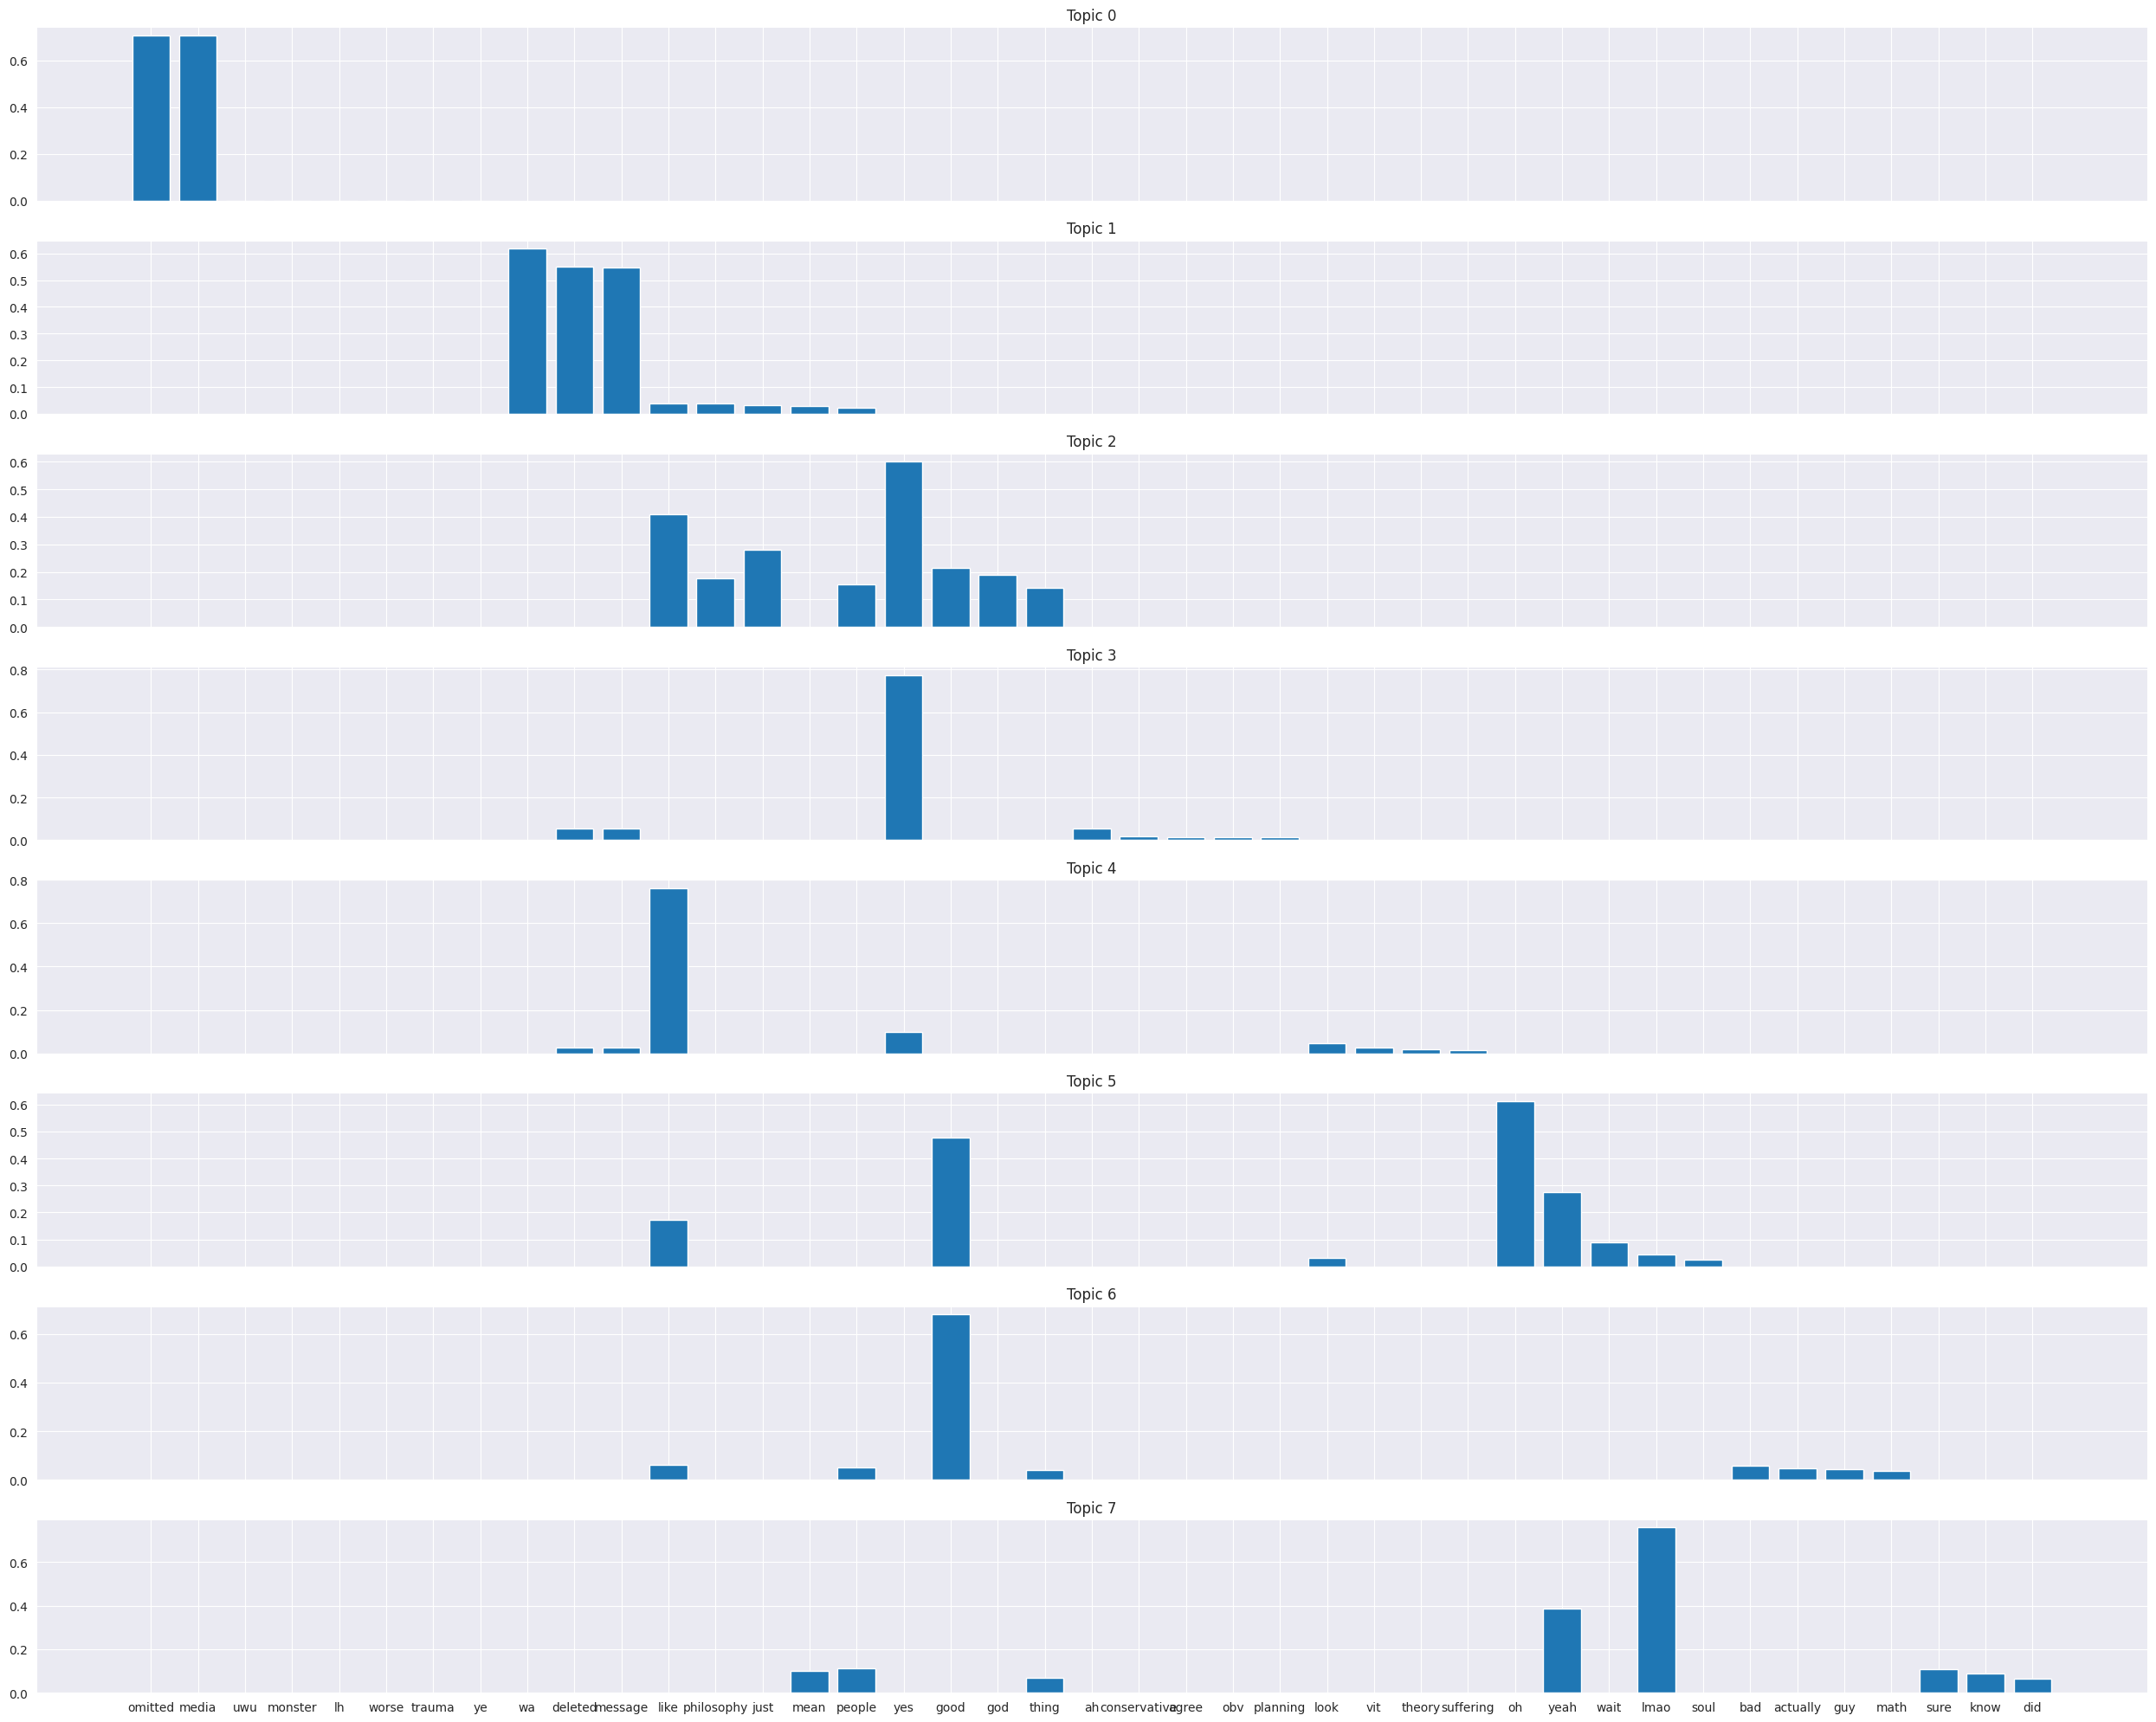

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot top topic keywords
import matplotlib.pyplot as plt

def plot_top_keywords(model, vectorizer, num_topics, num_words):
    # Plot top keywords for each topic
    fig, axes = plt.subplots(num_topics, 1, figsize=(25,20), sharex=True)
    axes = axes.flatten()
    for i in range(num_topics):
        # Get top keywords for topic i
        keywords = [(vectorizer.get_feature_names_out()[j], model.components_[i][j])
                    for j in model.components_[i].argsort()[:-num_words - 1:-1]]
        # Create barplot of top keywords
        axes[i].bar([k[0] for k in keywords], [k[1] for k in keywords])
        axes[i].set_title('Topic ' + str(i))
    plt.tight_layout()
    plt.show()


# Call function to plot top topic keywords
plot_top_keywords(lsa_model, vectorizer, num_topics=8, num_words=8)


Summarization

In [ ]:
import pandas as pd
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer



In [ ]:
df_topic.columns

Index(['user_message', 'message_date', 'msg_without_stopwords',
       'msg_lemmatized', 'topic_prediction', 'named_entities', 'LSA_topic'],
      dtype='object')

In [ ]:
# Get the most frequent topics and their corresponding messages
topic_freq = topic_model.get_topic_freq()
print(topic_freq)



    Topic  Count
0      -1   1026
1       0     77
2       1     62
3       2     59
4       3     56
..    ...    ...
73     72     12
74     73     12
75     74     12
76     75     10
77     76     10

[78 rows x 2 columns]


In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

model_name = 'google/pegasus-large'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)


In [ ]:
def generate_summary(text):
    # Tokenize the input text
    input_ids = tokenizer(text, truncation=True, padding='longest', max_length=1024, return_tensors='pt').input_ids

    # Generate the summary
    summary_ids = model.generate(input_ids, max_length=128, num_beams=4, length_penalty=2.0)

    # Decode the summary and return
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [ ]:
summaries = df_topic.groupby('topic_prediction')['msg_without_stopwords'].apply(lambda x: generate_summary(' '.join(x)))


In [ ]:
summaries

topic_prediction
-1     's cultured field study 's beauty : Isee 'll l...
 0     Media omitted >  Media omitted >  Media omitte...
 1     nothing kill death basically nothing left loos...
 2     chaos natural state universe [ Long philosophi...
 3     us ancient people thing Legendism > > > ( sorr...
                             ...                        
 72    Nice nah check SCP 049 Disease '' Bestie '14 S...
 73    sabbaths something like last Thursday problem,...
 74    think altruistic enough think long significant...
 75              n't getn't ask meansn't go well context
 76    anyways, discussion getting sidetracked rn any...
Name: msg_without_stopwords, Length: 78, dtype: object

# code for prioritization

In [ ]:
import nltk
from textblob import TextBlob

passages = summaries

urgency_keywords = {
    "as soon as possible": 3,
    "urgent": 3,
    "immediately": 3,
    "deadline": 2,
    "soon": 1
}

scores = []
for passage in passages:
    blob = TextBlob(passage)
    sentiment_score = blob.sentiment.polarity
    urgency_score = 0
    for keyword, score in urgency_keywords.items():
        if keyword in passage.lower():
            urgency_score += score
    scores.append((passage, len(passage), sentiment_score, urgency_score))


sorted_passages = sorted(scores, key=lambda x: (-x[1], -x[2], -x[3]))

print("Sorted passages based on length, sentiment, and urgency:")
for passage in sorted_passages:
    print(passage[0])

Sorted passages based on length, sentiment, and urgency:
Ol Haa * OK hey i dont think we have any to attempt EEE quiz coz it wa created by some other staff see the name Angeline may be she forgot to restrict this to her class did anyone try it guy Yes I have tried it. So how far ha our vedio gone @ 917004356797 Need help Completed DA phy Only 1,3,4,5 great You deleted this message did't u feel the question were tough ok are you okay He should have given some expectation eg so that we can do it a bit easily.....
???????????????????????????????????????????????????????????????
Nope doing


In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob

# # load the data into a pandas dataframe
# df = pd.read_csv('your_data.csv')

# define the urgency keywords
urgency_keywords = {
    "as soon as possible": 3,
    "urgent": 3,
    "immediately": 3,
    "deadline": 2,
    "soon": 1
}

# define a function to compute the priority score for each passage
def compute_priority_score(passage):
    blob = TextBlob(passage)
    sentiment_score = blob.sentiment.polarity
    urgency_score = 0
    for keyword, score in urgency_keywords.items():
        if keyword in passage.lower():
            urgency_score += score
    return (len(passage), sentiment_score, urgency_score)

# group the passages by their topic prediction
grouped = df_topic.groupby('topic_prediction')

# loop over the groups and compute the priority scores for each passage
for group_name, group_data in grouped:
    # get the passages for this group
    passages = group_data['msg_lemmatized'].tolist()

    # compute the priority scores for each passage
    scores = [compute_priority_score(passage) for passage in passages]

    # sort the passages based on their priority scores
    sorted_passages = sorted(zip(passages, scores), key=lambda x: (-x[1][0], -x[1][1], -x[1][2]))

    # print the sorted passages for this group
    print(f"Sorted passages for topic prediction {group_name}:")
    for passage in sorted_passages:
        print(passage[0])


Sorted passages for topic prediction 0:
Great work guy we made it .... it wa really the best performance on the class .... really learnt a lot from each of ur voice sorry if i irritated u while chatting and i dont want to delete this group
2 nd question is easy . Just input a string of mark . Then run a for loop and check 70 < =mark < =90 . Add all such mark and print it 's average .
okay i think v can go with the script ( else it will be hectic what do u guy think @ 917004356797 @ 918341700318 @ 919390473259
@ 917004356797 do we need to have rehersal for including audio while presenting tmrw or u are sure with what to do ? ?
I did n't add the clip because I thought that in the presentation adding an clip from the movie would n't look good .
guy we will have work by tmrw and day after tmrw i request u people to record the quote and send it to @ 917004356797
I still have the original video project file . So I can add some transition and fix the black screen issue at last .
i thought she

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

rouge = Rouge()

def evaluate_rouge(hypotheses, references):
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

# group the messages by topic prediction
grouped = df_topic.groupby('topic_prediction')

for name, group in grouped:
    # generate summaries for each group
    summaries = generate_summary(group['msg_lemmatized'])
    # get the reference summaries for each group
    references = group['msg_lemmatized'].tolist()
    # evaluate the generated summaries using ROUGE metrics
    scores = evaluate_rouge(summaries, references)
    print(f'Topic {name}: ROUGE-1: {scores["rouge-1"]}, ROUGE-2: {scores["rouge-2"]}, ROUGE-L: {scores["rouge-l"]}')


ValueError: ignored

In [ ]:
!pip install nltk
!pip install pycocoevalcap


In [ ]:
!pip install rouge-score

In [ ]:
!pip install nltk==3.5


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.meteor_score import meteor_score
# from rouge_score import rouge_n, rouge_l, rouge_w
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
import pandas as pd
from rouge import Rouge


def evaluate_summaries(summaries, references):
    # Calculate ROUGE scores
    # rouge_scores = []
    # for i in range(len(summaries)):
    #     rouge_scores.append({
    #         'rouge-1': rouge_n(summaries[i], references[i], n=1, alpha=0.5)['f'],
    #         'rouge-2': rouge_n(summaries[i], references[i], n=2, alpha=0.5)['f'],
    #         'rouge-l': rouge_l(summaries[i], references[i], alpha=0.5)['f'],
    #         'rouge-w': rouge_w(summaries[i], references[i], alpha=0.5)['f']
    #     })
    # rouge_df = pd.DataFrame(rouge_scores)

    # Calculate BLEU scores
    bleu_scores = []
    for i in range(len(summaries)):
        bleu_scores.append(sentence_bleu([references[i].split()], summaries[i].split()))
    bleu_df = pd.DataFrame({'bleu': bleu_scores})

    # Calculate METEOR scores
    meteor_scores = []
    for i in range(len(summaries)):
        meteor_scores.append(meteor_score([references[i]], summaries[i]))
    meteor_df = pd.DataFrame({'meteor': meteor_scores})

    # Calculate CIDEr scores
    cider_scorer = Cider()
    cider_scores = []
    for i in range(len(summaries)):
        refs = {'0': [references[i]]}
        hyps = {str(i): [summaries[i]]}
        cider_scores.append(cider_scorer.compute_score(refs, hyps)[0])
    cider_df = pd.DataFrame({'cider': cider_scores})

    # Return a concatenated dataframe
    return pd.concat([rouge_df, bleu_df, meteor_df, cider_df], axis=1)



In [ ]:
evaluate_summaries()

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load PEGASUS tokenizer and model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-large')

# Prepare the data for fine-tuning
train_data = [' '.join(doc) for doc in df_topic['msg_lemmatized']]

# Tokenize the input data
train_data_tokenized = tokenizer(train_data, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Fine-tune the PEGASUS model on the input data
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
for epoch in range(10):
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


NameError: ignored

In [ ]:
import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# Load Pegasus tokenizer and model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-large')

# Your code for loading data and preprocessing it goes here

# Loop through each topic and summarize the messages
for topic in topic_messages:
    # Combine all messages in the current topic into a single string
    text = ' '.join(topic_messages[topic])

    # Tokenize the text and get the input tensor
    inputs = tokenizer(text, truncation=True, padding='longest', max_length=1024, return_tensors='pt')
    input_ids = inputs['input_ids']

    # Print the shape and size of the input tensor
    print(input_ids.shape)
    print(input_ids.size())

    # If the shape and size of the input tensor is not compatible with the model,
    # adjust it as needed
    if input_ids.shape[1] > 1024:
        input_ids = input_ids[:, :1024]

    # Generate the summary using Pegasus model
    summary_ids = model.generate(input_ids, num_beams=4, max_length=100, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Append the summary to the list of summaries
    summaries.append(summary)

# Your code for saving the summaries goes here
summaries

In [ ]:
for topic in range(num_topics):
    print(f"Summarizing messages for topic {topic}")
    # Get all messages for the current topic
    messages = df[df['LSA_topic'] == topic]['msg_lemmatized']
    # Combine all messages into a single string
    text = ' '.join(messages)
    # Generate the summary using Pegasus model
    inputs = tokenizer(text, truncation=True, padding='longest', max_length=1024, return_tensors='pt')
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=100, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    # Append the summary to the list of summaries
    summaries.append(summary)


In [ ]:
# Install transformers library
!pip install transformers

In [ ]:


from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load Pegasus tokenizer
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')

# Load Pegasus model
sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-large')


In [ ]:
# Prepare data for summarization
input_text = df_topic['msg_lemmatized'][590]+ df_topic['msg_lemmatized'][591]+df_topic['msg_lemmatized'][592]+df_topic['msg_lemmatized'][593]+df_topic['msg_lemmatized'][594] # Select the first message to summarize
input_ids = tokenizer.encode(input_text, return_tensors='pt')  # Encode the input text
output = sum_model.generate(input_ids, max_length=50, num_beams=5, early_stopping=True)  # Generate the summary
summary = tokenizer.decode(output[0], skip_special_tokens=True)  # Decode the generated summary

print(f'Input text: {input_text}')
print(f'Summary: {summary}')